In [1]:
# Importing some libraries

from nltk import word_tokenize #usando nltk pra pre-processar os textos (criar uma lista de palavras do texto)
from nltk.probability import FreqDist #daí, vou pegar a frequencia de distribuição dessas palavras no texto
from matplotlib import pyplot as plt
from wordcloud import WordCloud #construir nuvem de palavras
import urllib.request # essas duas últimas linhas é pra trazer as informações da internet
from bs4 import BeautifulSoup

In [8]:
text_file = urllib.request.urlopen("https://www.institutoprincipia.org/post/emmy-noether-e-as-leis-de-conserva%C3%A7%C3%A3o")

# Lendo apenas o texto da página
response = text_file.read().decode("utf-8")
soup = BeautifulSoup(response, "html.parser") #leitura do texto codificado em utf8 por meio da métrica html.parser
text = soup.get_text() #pegando apenas os textos
text = text.lower() #transformando em minúscula 

#Verificando uma parte do texto
print(text[1400:2000])

s isto mudou com os trabalhos da matemática emmy noether que achou uma correspondência entre as leis de conservação e as simetrias de um sistema físico. este resultado é considerado por muitos, o resultado mais bonito da física.amalie emmy noether (1882-1935) foi uma matemática alemã, considerada por einstein “a mulher mais importante na história da matemática''. ela fez diversas contribuições para a álgebra, porém na física, seu nome é mais conhecido devido ao chamado teorema de noether.o teorema de noether diz que sempre existe uma simetria correspondente a cada lei de conservação. por exemp


In [9]:
#Contagem de quantas palavras consegui extrair nesse texto.

words = word_tokenize(text)

print(f"O número de palavras do texto é: {len(words)}")

O número de palavras do texto é: 571


In [11]:
#Expondo a frequência de distribuição de cada palavra
fdist = FreqDist(words)

#mostrando as 10 mais comuns
fdist.most_common(10)

[('de', 33),
 (',', 24),
 ('que', 13),
 ('conservação', 12),
 ('da', 12),
 ('e', 9),
 ('.', 9),
 ('por', 9),
 ('é', 9),
 ('o', 9)]

In [12]:
#removendo pontuação
words_no_punc = []

for word in words:
    if word.isalpha():
        words_no_punc.append(word)

print(f"O número de palavras sem pontuação é: {len(words_no_punc)}")

O número de palavras sem pontuação é: 482


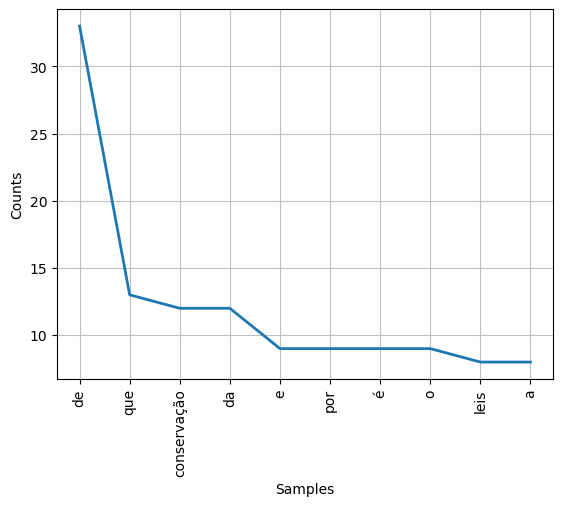

In [13]:
#Verificando graficamente as 10 mais comuns:
fdist = FreqDist(words_no_punc)
fdist.plot(10)
plt.show()

In [14]:
#utilizando stopwords pra cortar todos esses conectivos.
#Contudo, ter atenção que dependendo do objetivo, eu tenho que manter. O "não" faz parte dessa lista. Em termos de
# semântica, é importante mantê-lo. Mas para uma wordcloud, não.
from nltk.corpus import stopwords
stopwords_list = stopwords.words("portuguese")
print(stopwords_list)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [15]:
clean_words = []

for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"O número de palavras sem pontuação e stopwords é: {len(clean_words)}")

O número de palavras sem pontuação e stopwords é: 282


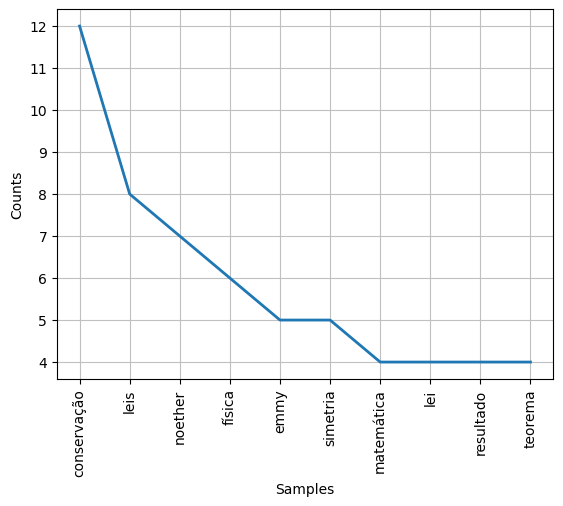

In [16]:
fdist = FreqDist(clean_words)
fdist.plot(10)
plt.show()

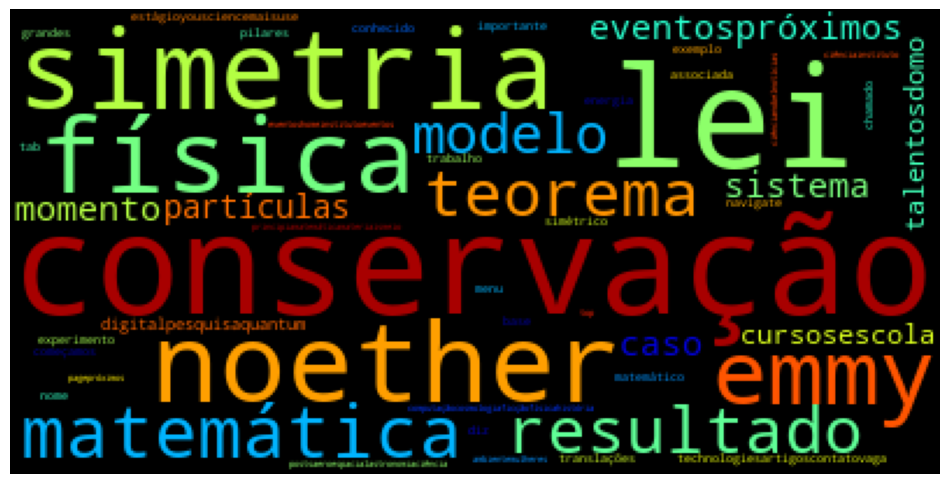

In [17]:
#Agora vou montar a wordcloud.
#Para isso, primeiro vou pegar a lista de palavras e fazer um join, montando uma única string, enorme, com
#todas as palavras, separadas apenas por um espaço.
clean_words_string = " ".join(clean_words)

#gerando a nuvem
wordcloud = WordCloud(background_color="black", colormap="jet").generate(clean_words_string)

#plotando a nuvem
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#Removendo os eixos
plt.axis("off")
plt.show()

In [ ]:
#Esse tipo de wordcloud pode ser importante em NPS (Net Promoter Score), pois a Petz pode, por exemplo, usar
# a nuvem de palavras pra avaliar os comentários de maneira geral, por alto mesmo.